##  读取csv

In [1]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#设置工作空间f
os.chdir(r'E:/Taidy')

## 使用read_csv读取
order = pd.read_csv('Data/附件1.csv', engine = 'python', encoding = 'gbk')
print('附件一的数据类型为：', '\n', order.shape)

order['支付时间'] = pd.to_datetime(order['支付时间'], errors = 'coerce', format = '%Y-%m-%d')

附件一的数据类型为： 
 (70680, 9)


## 清洗数据

In [2]:
#数据清洗，去缺失值
print('缺失值数量:\n', order.isnull().sum())

缺失值数量:
 订单号     0
设备ID    0
应付金额    0
实际金额    0
商品      0
支付时间    1
地点      0
状态      0
提现      0
dtype: int64


In [3]:
#数据清洗，去缺失值
print('去除缺失值之前： ',order.shape)
order = order.dropna()
print('去除缺失值之后： ',order.shape)

去除缺失值之前：  (70680, 9)
去除缺失值之后：  (70679, 9)


In [4]:
print('去重前附件一的形状为：',order.shape)

##样本去重
order.drop_duplicates(inplace = True)
print('附件一样本去重后的长度为：',len(order))


去重前附件一的形状为： (70679, 9)
附件一样本去重后的长度为： 70679


In [43]:
# -*- coding: gbk -*-

##定义异常值识别与处理函数
def outRange(Ser1):
    QL = Ser1.quantile(0.25)
    QU = Ser1.quantile(0.75)
    IQR = QU-QL
    Ser1.loc[Ser1>(QU+1.5*IQR)] = QU
    Ser1.loc[Ser1<(QL-1.5*IQR)] = QL
    return Ser1
## 处理应付金额和实际金额的异常值
order['应付金额'] = outRange(order['应付金额'])
order['实际金额'] = outRange(order['实际金额'])

##查看处理后的应付金额和实际金额的最小值，最大值
print('应付金额最小值为：', order['应付金额'].min())
print('应付金额最大值为：', order['应付金额'].max())
print('实际金额最小值为：', order['实际金额'].min())
print('实际金额最大值为：', order['实际金额'].max())

应付金额最小值为： 0.8
应付金额最大值为： 6.5
实际金额最小值为： 0.8
实际金额最大值为： 6.5


In [44]:
print('数据预处理后附件一的形状:', order.shape)
appendix1 = order.to_csv('Data/appendix1.csv', sep = ';', index = True)

数据预处理后附件一的形状: (70679, 9)


### 提取每台售货机对应的销售数据

In [45]:
order1 = order.iloc[(order['地点']=='A').values,[0, 1, 2, 3, 4, 5, 6, 7, 8]]
order2 = order.iloc[(order['地点']=='B').values,[0, 1, 2, 3, 4, 5, 6, 7, 8]]
order3 = order.iloc[(order['地点']=='C').values,[0, 1, 2, 3, 4, 5, 6, 7, 8]]
order4 = order.iloc[(order['地点']=='D').values,[0, 1, 2, 3, 4, 5, 6, 7, 8]]
order5 = order.iloc[(order['地点']=='E').values,[0, 1, 2, 3, 4, 5, 6, 7, 8]]


In [46]:
import numpy as np
#增加month一列
order1['month'] = [i.month for i in order1['支付时间']]
detailGroup1 = order1[['month','订单号','实际金额']].groupby(by='month')

order2['month'] = [i.month for i in order2['支付时间']]
detailGroup2 = order2[['month','订单号','实际金额']].groupby(by='month')

order3['month'] = [i.month for i in order3['支付时间']]
detailGroup3 = order3[['month','订单号','实际金额']].groupby(by='month')

order4['month'] = [i.month for i in order4['支付时间']]
detailGroup4 = order4[['month','订单号','实际金额']].groupby(by='month')

order5['month'] = [i.month for i in order5['支付时间']]
detailGroup5 = order5[['month','订单号','实际金额']].groupby(by='month')

Group1 = detailGroup1.agg({'订单号':np.size,'实际金额':np.sum})
Group2 = detailGroup2.agg({'订单号':np.size,'实际金额':np.sum})
Group3 = detailGroup3.agg({'订单号':np.size,'实际金额':np.sum})
Group4 = detailGroup4.agg({'订单号':np.size,'实际金额':np.sum})
Group5 = detailGroup5.agg({'订单号':np.size,'实际金额':np.sum})






## 数据合并

In [47]:
#把预处理后的order1到order5纵向合并起来
temp1 = order1.append(order2)
temp2 = temp1.append(order3)
temp3 = temp2.append(order4)
a1 = temp3.append(order5)
a1.to_csv('Data/appendix_1.csv', sep = ';', index = False)#将a1保存为csv文件

a1['month'] = a1['month'].astype('object')#将month数据类型从int64转化为object
print(a1.dtypes)

订单号              object
设备ID             object
应付金额            float64
实际金额            float64
商品               object
支付时间     datetime64[ns]
地点               object
状态               object
提现               object
month            object
dtype: object


## 数据可视化
### 任务2.1

In [48]:
a1_201706 = a1.iloc[(a1['month']== 6).values,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
print('2017年6月销量前5的商品及其销量为：\n', a1_201706['商品'].value_counts()[:5])

2017年6月销量前5的商品及其销量为：
 怡宝纯净水         657
40g双汇玉米热狗肠    240
东鹏特饮          238
脉动            235
250ml维他柠檬茶    225
Name: 商品, dtype: int64


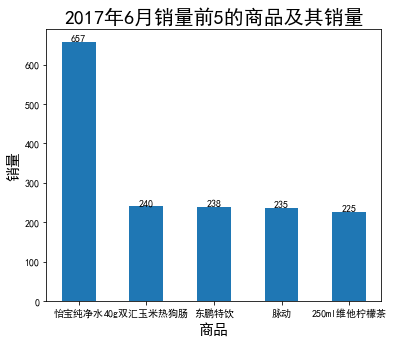

In [49]:
plt.figure(figsize=(6,5))## 设置画布
plt.rcParams['font.sans-serif'] = 'simhei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
label = ['怡宝纯净水','40g双汇玉米热狗肠','东鹏特饮', '脉动', '250ml维他柠檬茶']## 刻度标签

my_height = [657, 240, 238, 235, 225]
plt.bar(range(5), my_height, width = 0.5)## 绘制柱状图
plt.xlabel('商品', fontsize=15)## 添加横轴标签
plt.ylabel('销量', fontsize=15)## 添加y轴名称
plt.xticks(range(5), label)
plt.title('2017年6月销量前5的商品及其销量', fontsize=20)## 添加图表标题

for i in range(len(my_height)):
    plt.text(i, my_height[i], my_height[i], va='bottom', ha='center')
    
plt.savefig('temp/2017年6月销量前5的商品及其销量.png')
plt.show()


### 任务2.2

In [50]:
os.chdir(r'E:/Taidy/Data/task2')

Group1['MOM'] = 'null'#添加月环比增长率‘MOM’
Group2['MOM'] = 'null'
Group3['MOM'] = 'null'
Group4['MOM'] = 'null'
Group5['MOM'] = 'null'

##把拆分出来的每台售货机的月订单量和月交易总额保存在excel文件中
Group1.to_excel('task2-1A.xlsx',sheet_name='Sheet1',index=False)
Group2.to_excel('task2-1B.xlsx',sheet_name='Sheet2',index=False)
Group3.to_excel('task2-1C.xlsx',sheet_name='Sheet3',index=False)
Group4.to_excel('task2-1D.xlsx',sheet_name='Sheet4',index=False)
Group5.to_excel('task2-1E.xlsx',sheet_name='Sheet5',index=False)



In [51]:
#计算每台售货机的交易额月环比增长率并保存在excel
# 打开文件
filepath ="E:/Taidy/Data/task2"
dirs = os.listdir( filepath )
s = []
# 输出所有文件和文件夹
for file in dirs:
    s.append(file)
print(s)

for file in s:
    _month = pd.read_excel(file)
    for i in range(0,len(_month)):
        if i == 0:
            _month['MOM'[i]] = 'null'
        else:
            _month['MOM'][i] = format((_month['实际金额'][i] - _month['实际金额'][i-1]) / _month['实际金额'][i-1],'.2%')
            #format(res,'.2%') 小数格式化为百分数
    print(_month)
    _month.to_excel(file,index=False)
    

['task2-1A.xlsx', 'task2-1B.xlsx', 'task2-1C.xlsx', 'task2-1D.xlsx', 'task2-1E.xlsx']
     订单号    实际金额      MOM     M
0    335  1206.2      NaN  null
1    114   374.0  -68.99%  null
2    255   810.2  116.63%  null
3    447  1618.2   99.73%  null
4    756  2816.8   74.07%  null
5   1669  5850.4  107.70%  null
6    476  1702.3  -70.90%  null
7    666  2078.1   22.08%  null
8   1040  3811.0   83.39%  null
9   1565  5458.7   43.24%  null
10  1160  4335.8  -20.57%  null
11  2003  6808.1   57.02%  null
     订单号    实际金额      MOM     M
0    366  1250.5      NaN  null
1    185   580.8  -53.55%  null
2    265   886.8   52.69%  null
3    603  2111.8  138.14%  null
4    869  3223.8   52.66%  null
5   1856  6589.0  104.39%  null
6    345  1248.2  -81.06%  null
7    981  3335.2  167.20%  null
8   1745  6088.9   82.56%  null
9   2026  7291.7   19.75%  null
10  2031  7094.8   -2.70%  null
11  2210  7484.6    5.49%  null
     订单号    实际金额      MOM     M
0    379  1382.2      NaN  null
1    207   738.5  

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     订单号     实际金额      MOM     M
0    354   1335.9      NaN  null
1    258    878.3  -34.25%  null
2    350   1447.0   64.75%  null
3    895   3210.3  121.86%  null
4   1292   4996.1   55.63%  null
5   2593   9049.0   81.12%  null
6    813   2840.1  -68.61%  null
7   1767   6384.1  124.78%  null
8   4134  15164.3  137.53%  null
9   2777   9738.9  -35.78%  null
10  5020  18935.3   94.43%  null
11  3252  12044.4  -36.39%  null


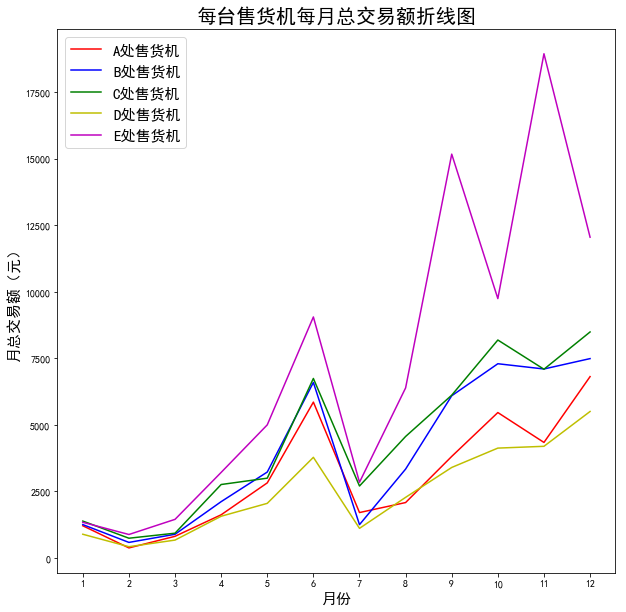

In [52]:
## 绘制折线图
#设置工作路径
os.chdir(r'E:/Taidy')

A_month = pd.read_excel('Data/task2/task2-1A.xlsx')
B_month = pd.read_excel('Data/task2/task2-1B.xlsx')
C_month = pd.read_excel('Data/task2/task2-1C.xlsx')
D_month = pd.read_excel('Data/task2/task2-1D.xlsx')
E_month = pd.read_excel('Data/task2/task2-1E.xlsx')

values1 = A_month['实际金额']## 提取其中的values数组，数据的存在位置
values2 = B_month['实际金额']
values3 = C_month['实际金额']
values4 = D_month['实际金额']
values5 = E_month['实际金额']
label1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.figure(figsize=(10,10))## 设置画布
plt.xlabel('月份', fontsize=15)## 添加横轴标签
plt.ylabel('月总交易额（元）', fontsize=15)## 添加y轴名称
plt.xticks(label1)
plt.title('每台售货机每月总交易额折线图', fontsize=20)## 添加图表标题

plt.plot(label1,values1,'r-',
        label1,values2,'b-',
        label1,values3,'g-',
        label1,values4,'y-',
        label1,values5,'m-')
plt.legend(['A处售货机', 'B处售货机', 'C处售货机', 'D处售货机', 'E处售货机'], fontsize=15)

plt.savefig('temp/每台售货机每月总交易额折线图.png')
plt.show()

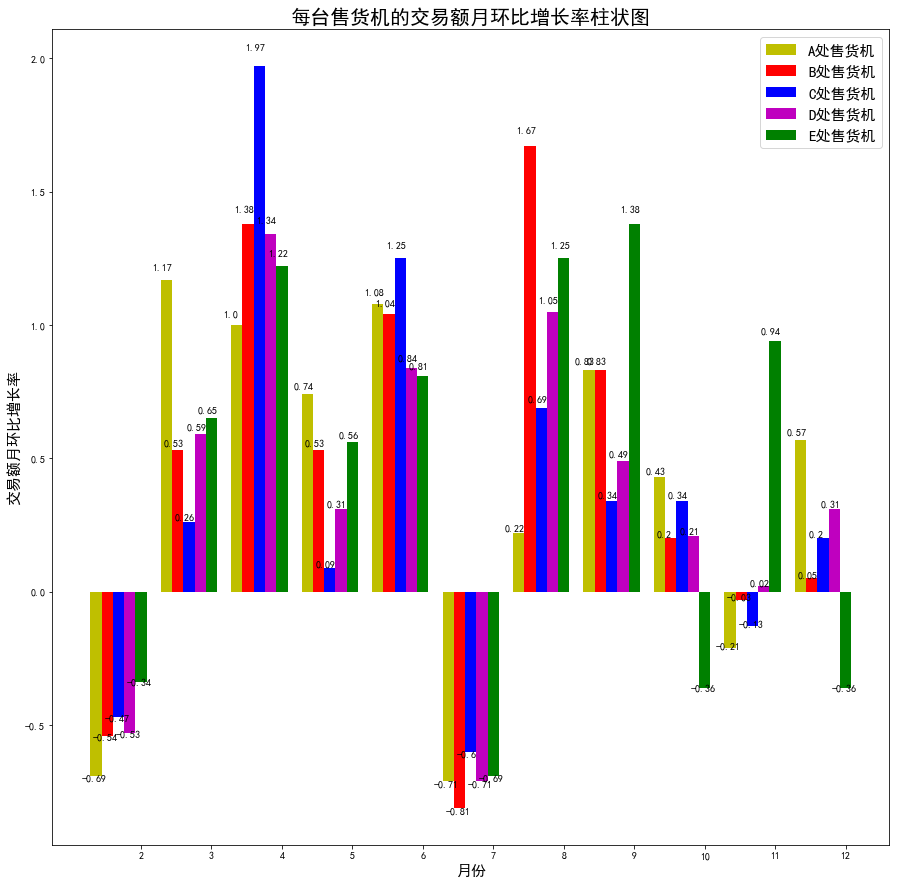

In [53]:
#绘制柱状图
plt.figure(figsize=(15,15))## 设置画布
plt.rcParams['font.sans-serif'] = 'simhei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
name = [ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]## 刻度标签

#把月环比增长率从字符串类型转化为float,并取两位小数
A_height_ = round(A_month['MOM'].str.strip("%").astype(float)/100, 2)
B_height_ = round(B_month['MOM'].str.strip("%").astype(float)/100, 2) 
C_height_ = round(C_month['MOM'].str.strip("%").astype(float)/100, 2) 
D_height_ = round(D_month['MOM'].str.strip("%").astype(float)/100, 2) 
E_height_ = round(E_month['MOM'].str.strip("%").astype(float)/100, 2) 
#因为第一个月没有月环比增长率，所以从第二行数据开始
A_height = A_height_[1:]
B_height = B_height_[1:]
C_height = C_height_[1:]
D_height = D_height_[1:]
E_height = E_height_[1:]

plt.xlabel('月份', fontsize=15 )## 添加横轴标签
plt.ylabel('交易额月环比增长率', fontsize=15)## 添加y轴名称
plt.xticks(range(11), label)
plt.title('每台售货机的交易额月环比增长率柱状图', fontsize=20)## 添加图表标题

def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))

total_width, n = 0.8, 5 
width = total_width / n 
x=[0,1,2,3,4,5,6,7,8,9,10]
     
A=plt.bar(x, A_height, width=width, label='A处售货机',tick_label = name,fc = 'y')  
for i in range(len(x)):  
    x[i] = x[i] + width  
    #print(x[i])
B=plt.bar(x, B_height, width=width, label='B处售货机',tick_label = name,fc = 'r')
for i in range(len(x)):  
    x[i] = x[i] + width  
C=plt.bar(x, C_height, width=width, label='B处售货机',tick_label = name,fc = 'b')
for i in range(len(x)):  
    x[i] = x[i] + width  
D=plt.bar(x, D_height, width=width, label='D处售货机',tick_label = name,fc = 'm')
for i in range(len(x)):  
    x[i] = x[i] + width  
E=plt.bar(x, E_height, width=width, label='E处售货机',tick_label = name,fc = 'g')
#for i in range(len(A_height)):#标记刻度
#    plt.text(i, A_height[i], A_height[i], va='bottom', ha='center')
plt.legend(['A处售货机', 'B处售货机', 'C处售货机', 'D处售货机', 'E处售货机'], fontsize=15)
autolabel(A)
autolabel(B)
autolabel(C)
autolabel(D)
autolabel(E)


plt.savefig('temp/每台售货机的交易额月环比增长率柱状图.png')
plt.show()

#autolabel(A)

### 任务2.3

In [54]:
os.chdir(r'E:/Taidy')
#主键合并
app0 = pd.read_csv('Data/附件1.csv', sep=',', engine = 'python', encoding='gbk') ##读取附件1
app0.drop(labels = 70679, axis = 0, inplace = True)##删除异常值
app1 = app0

app2 = pd.read_csv('Data/附件2.csv', sep=',',engine = 'python', encoding='gbk') ##读取附件2
print(app2.head(3))

app_merge = pd.merge(app1, app2, left_on='商品', right_on = '商品')

app_merge['支付时间'] = pd.to_datetime(app_merge['支付时间'])

                商品   大类       二级类
0       100g*5瓶益力多   饮料       乳制品
1  100g越南LIPO奶味面包干  非饮料      饼干糕点
2      10g卫龙亲嘴烧香辣味  非饮料  肉干/豆制品/蛋


In [55]:
#筛选出饮料类和非饮料类
app_merge1 = app_merge.iloc[(app_merge['大类']=='饮料').values, [3, 4, 5, 6, 9, 10]]
app_merge2 = app_merge.iloc[(app_merge['大类']=='非饮料').values,[3, 4, 5, 6, 9, 10]]

#筛选出各台售货机
app_merge1A = app_merge1.iloc[(app_merge1['地点']=='A').values, [0,1,2,3,4,5]]
app_merge2A = app_merge2.iloc[(app_merge2['地点']=='A').values, [0,1,2,3,4,5]]

app_merge1B = app_merge1.iloc[(app_merge1['地点']=='B').values, [0,1,2,3,4,5]]
app_merge2B = app_merge2.iloc[(app_merge2['地点']=='B').values, [0,1,2,3,4,5]]

app_merge1C = app_merge1.iloc[(app_merge1['地点']=='C').values, [0,1,2,3,4,5]]
app_merge2C = app_merge2.iloc[(app_merge2['地点']=='C').values, [0,1,2,3,4,5]]

app_merge1D = app_merge1.iloc[(app_merge1['地点']=='D').values, [0,1,2,3,4,5]]
app_merge2D = app_merge2.iloc[(app_merge2['地点']=='D').values, [0,1,2,3,4,5]]

app_merge1E = app_merge1.iloc[(app_merge1['地点']=='E').values, [0,1,2,3,4,5]]
app_merge2E = app_merge2.iloc[(app_merge2['地点']=='E').values, [0,1,2,3,4,5]]

print('A处售货机毛利润为：', app_merge1A.agg({'实际金额':np.sum}) * 0.25 + app_merge2A.agg({'实际金额':np.sum}) * 0.2)
print('B处售货机毛利润为：', app_merge1B.agg({'实际金额':np.sum}) * 0.25 + app_merge2B.agg({'实际金额':np.sum}) * 0.2)
print('C处售货机毛利润为：', app_merge1C.agg({'实际金额':np.sum}) * 0.25 + app_merge2C.agg({'实际金额':np.sum}) * 0.2)
print('D处售货机毛利润为：', app_merge1D.agg({'实际金额':np.sum}) * 0.25 + app_merge2D.agg({'实际金额':np.sum}) * 0.2)
print('E处售货机毛利润为：', app_merge1E.agg({'实际金额':np.sum}) * 0.25 + app_merge2E.agg({'实际金额':np.sum}) * 0.2)

A处售货机毛利润为： 实际金额    9707.585
dtype: float64
B处售货机毛利润为： 实际金额    12543.82
dtype: float64
C处售货机毛利润为： 实际金额    14291.365
dtype: float64
D处售货机毛利润为： 实际金额    7703.34
dtype: float64
E处售货机毛利润为： 实际金额    22341.23
dtype: float64


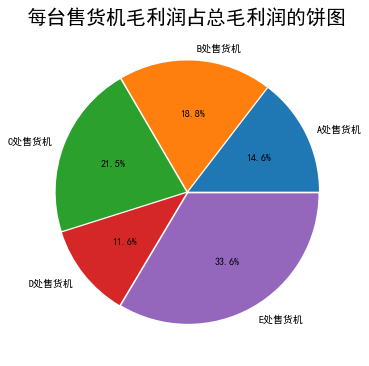

In [56]:
plt.rcParams['font.sans-serif'] = 'simhei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,6))## 将画布设定为正方形，则绘制的饼图是正圆
label= ['A处售货机','B处售货机','C处售货机','D处售货机','E处售货机']## 定义饼状图的标签，标签是列表
explode = [0.01, 0.01, 0.01, 0.01, 0.01]## 设定各项离心n个半径
plt.pie([9707.585, 12543.82, 14291.365, 7703.34, 22341.23], explode=explode, labels=label, autopct='%1.1f%%')## 绘制饼图
plt.title('每台售货机毛利润占总毛利润的饼图', fontsize=20)
plt.savefig('temp/每台售货机毛利润占总毛利润的饼图.png')
plt.show()

### 任务2.4

In [57]:
app_merge['支付时间'] = pd.to_datetime(app_merge['支付时间'])
app_merge['month'] = [i.month for i in app_merge['支付时间']]
app_merge[['month','订单号','实际金额']].groupby(by='month')

retail_cl = app_merge.groupby('二级类').sum()
print(retail_cl.head())

         应付金额     实际金额  month
二级类                          
乳制品   39886.3  39886.3  73823
其他      511.7    511.7   1523
功能饮料  36796.4  36796.4  68125
咖啡     5922.5   5922.5   7716
坚果炒货    836.1    836.1    953


In [58]:
list_month = np.arange(1, 13).tolist()
print(list_month)
task_2_4 = pd.DataFrame(np.zeros((20, 12)), index = retail_cl.index, columns = list_month)
print(task_2_4)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           1    2    3    4    5    6    7    8    9    10   11   12
二级类                                                                 
乳制品       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
其他        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
功能饮料      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
咖啡        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
坚果炒货      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
方便速食      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
果冻/龟苓膏    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
果蔬饮料      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
植物蛋白      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
水         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
海味零食      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
碳酸饮料      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [59]:
for i in list_month:
    for j in task_2_4.index:
        temp_sh = app_merge.loc[((app_merge['二级类'] == j) & 
                                  (app_merge['month'] == i)), :]
        task_2_4[i][j] = temp_sh['实际金额'].sum()

In [60]:
task_2_4

,1,2,3,4,5,6,7,8,9,10,11,12
二级类,,,,,,,,,,,,
乳制品,1148.0,343.0,594.8,1857.3,2651.6,5405.5,1574.4,2179.4,5892.6,5554.3,7278.7,5406.7
其他,0.0,0.0,0.1,0.3,0.0,3.4,26.0,32.0,150.4,62.1,215.7,21.7
功能饮料,718.5,663.5,955.0,1558.3,1658.3,3653.7,1181.0,3672.1,4983.8,4403.9,6322.5,7025.8
咖啡,169.5,23.5,33.5,296.5,610.5,515.0,230.0,154.0,1064.0,675.0,1253.0,898.0
坚果炒货,50.0,0.0,21.0,30.8,79.8,146.8,61.5,0.0,108.5,79.6,164.5,93.6
方便速食,457.0,122.9,345.6,824.5,2022.5,3009.5,890.7,773.2,2482.1,2470.5,3547.3,2720.5
果冻/龟苓膏,5.0,0.0,5.0,27.0,32.0,17.0,22.0,0.0,108.0,30.0,66.0,55.0
果蔬饮料,217.0,180.5,140.0,393.0,553.5,891.0,296.5,849.0,1583.0,1292.5,1953.5,1462.5
植物蛋白,263.2,63.6,197.0,438.6,608.6,1497.0,381.4,270.5,1196.7,1288.2,1216.0,1348.6


In [61]:
mp_s = pd.Series(np.arange(len(task_2_4)), index = task_2_4.index)
print(mp_s)

二级类
乳制品          0
其他           1
功能饮料         2
咖啡           3
坚果炒货         4
方便速食         5
果冻/龟苓膏       6
果蔬饮料         7
植物蛋白         8
水            9
海味零食        10
碳酸饮料        11
糖果/巧克力      12
纸巾          13
肉干/豆制品/蛋    14
膨化食品        15
茶饮料         16
蜜饯/果干       17
饼干糕点        18
香烟          19
dtype: int32


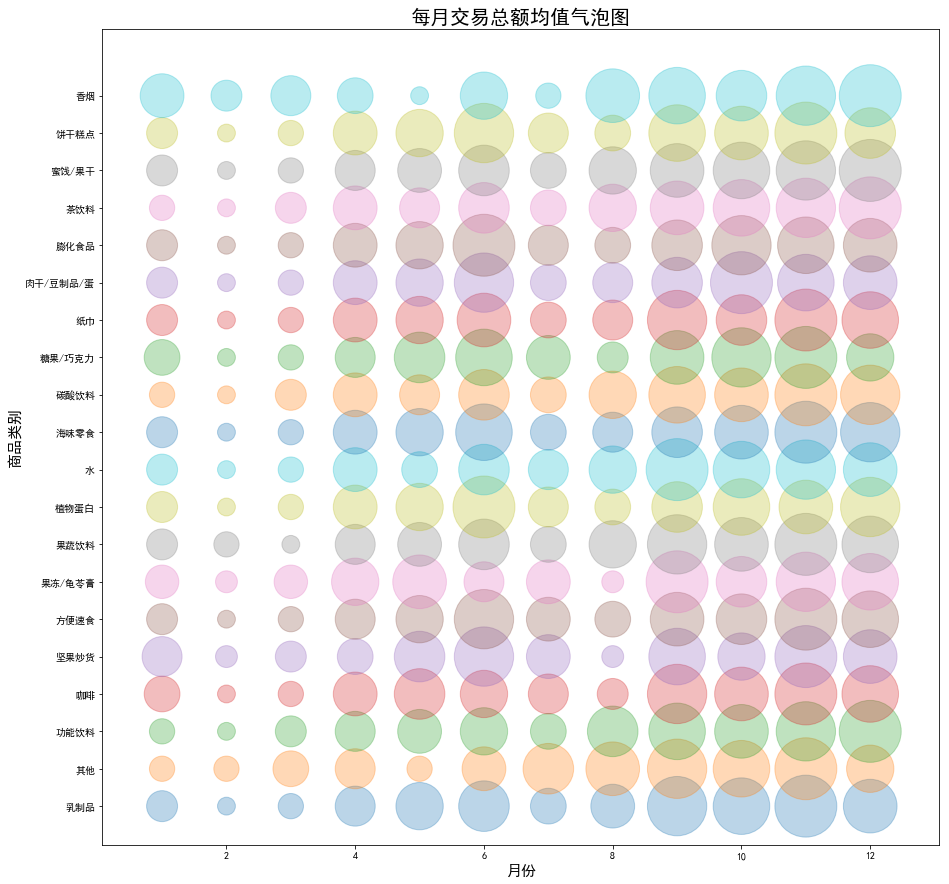

In [62]:
import random

## 设置字体为SimHei显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False ## 设置正常显示符号

plt.figure(figsize=(15, 15)) # 将画布设定为正方形
plt.title('每月交易总额均值气泡图', fontsize=20)
plt.xlabel('月份', fontsize=15)
plt.ylabel('商品类别', fontsize=15)

for i in task_2_4.index:
    #print('i = ', i)
    x = list(list_month)
    y = list(np.ones(12) * mp_s[i])
    cm = plt.cm.get_cmap('RdYlBu')#设置气泡颜色
    size = task_2_4.loc[i].rank() 
    plt.scatter(x, y, s = 320 * size, cmap = cm, alpha = 0.3)
    plt.yticks(range(len(task_2_4)), list(task_2_4.index))
    
plt.savefig('temp/每月交易总额均值气泡图.png')
plt.show()

### 任务2.5

In [28]:
app_merge.dtypes

订单号              object
设备ID             object
应付金额            float64
实际金额            float64
商品               object
支付时间     datetime64[ns]
地点               object
状态               object
提现               object
大类               object
二级类              object
month             int64
dtype: object

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm 
from matplotlib import axes



#添加'日期'列
app_merge['日期'] = app_merge['支付时间'].dt.day

#添加'小时'列
app_merge['小时'] = app_merge['支付时间'].dt.hour

print(app_merge.head())

                               订单号             设备ID  应付金额  实际金额            商品  \
0    DD201708167493663618499909784  E43A6E078A07631   4.5   4.5  68g好丽友巧克力派2枚   
1     DD20170816749368329675770932  E43A6E078A07631   4.5   4.5  68g好丽友巧克力派2枚   
2  DD20170816749300229112037656709  E43A6E078A06874   4.5   4.5  68g好丽友巧克力派2枚   
3    DD201708167493529849068514902  E43A6E078A04228   4.0   4.0  68g好丽友巧克力派2枚   
4    DD201708167493876353091909391  E43A6E078A04228  14.0  14.0  68g好丽友巧克力派2枚   

                 支付时间 地点      状态   提现   大类   二级类  month  日期  小时  
0 2017-01-01 00:53:00  D  已出货未退款  已提现  非饮料  饼干糕点      1   1   0  
1 2017-01-02 20:58:00  D  已出货未退款  已提现  非饮料  饼干糕点      1   2  20  
2 2017-01-03 01:53:00  E  已出货未退款  已提现  非饮料  饼干糕点      1   3   1  
3 2017-01-08 20:22:00  C  已出货未退款  已提现  非饮料  饼干糕点      1   8  20  
4 2017-01-09 21:38:00  C  已出货未退款  已提现  非饮料  饼干糕点      1   9  21  


In [30]:
def draw_heatmap(data,xlabels,ylabels, title, filename):
#     plt.figure(figsize = (15, 10)) # 将画布设定为长方形
    
    cmap = cm.get_cmap('summer',1000)
    figure = plt.figure(figsize = (20, 15), facecolor = 'w') #
    ax = figure.add_subplot(1,1,1,position = [0.1,0.15,0.8,0.8]) #
    
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels)
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels)
    
    map = ax.imshow(data,interpolation = 'nearest',cmap = cmap,aspect = 'auto')
    cb = plt.colorbar(mappable = map,cax = None,ax = None,shrink = 1)
    
    plt.xlabel('日期', fontsize = 15)
    plt.ylabel('小时',fontsize = 15)
    plt.title(title, fontsize = 20)
    plt.savefig(filename)
    plt.show()
    
def insert_row(data, loc, index, value):
    # 对DataFrame对象插入行index
    # length = data.shape[0]
    # width = data.shape[1]
    
    insert_row = pd.Series(list(np.array([value] * data.shape[1])), 
                          index = data.columns)
    above = data.loc[: loc-1]
    below = data.loc[loc :]
    data = above.append(insert_row, ignore_index = True).append(below, ignore_index = True)
    return data
    
x_30 = list(np.arange(1, 31))
x_31 = list(np.arange(1, 32))
y_24 = list(np.arange(24))

In [31]:
# June
temp_sh = app_merge.loc[((app_merge['month'] == 6) & 
                          (app_merge['地点'] == 'C')), :]
heat_data1 = temp_sh.groupby(['日期', '小时'])['订单号'].count().unstack()#把花括号结构转化为表格结构
heat_data1 = heat_data1.fillna(0)  #把NaN填为0
heat_data1 = heat_data1.T          #转置

In [32]:
heat_data1

日期,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
小时,,,,,,,,,,,,,,,,,,,,,
0,6.0,2.0,2.0,0.0,1.0,5.0,0.0,1.0,1.0,0.0,...,1.0,2.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,4.0
1,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,3.0,3.0,3.0,0.0,2.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0
3,0.0,1.0,3.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,5.0
4,2.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,...,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,8.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0
7,6.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,...,2.0,4.0,3.0,1.0,1.0,0.0,4.0,1.0,1.0,5.0
8,4.0,2.0,2.0,2.0,4.0,5.0,4.0,4.0,2.0,0.0,...,2.0,4.0,0.0,1.0,4.0,0.0,1.0,2.0,4.0,8.0


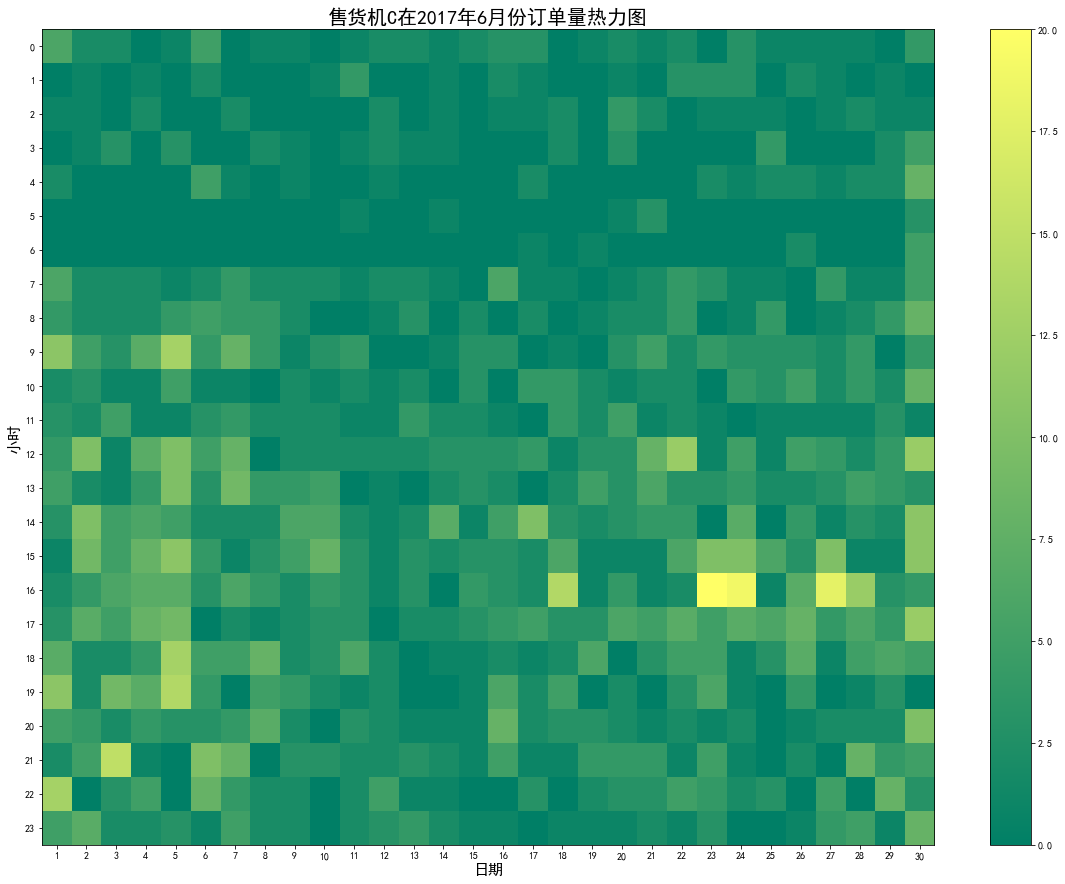

In [33]:
draw_heatmap(heat_data1, x_30, y_24,
             '售货机C在2017年6月份订单量热力图','temp/售货机C在2017年6月份订单量热力图.png') 

In [34]:
# July
temp_sh = app_merge.loc[((app_merge['month'] == 7) & 
                          (app_merge['地点'] == 'C')), :]
heat_data2 = temp_sh.groupby(['日期', '小时'])['订单号'].count().unstack()#把花括号结构转化为表格结构
heat_data2 = heat_data2.fillna(0)  #把NaN填为0
heat_data2 = heat_data2.T          #转置

In [35]:
heat_data2

日期,1,2,3,4,5,6,7,8,9,11,...,22,23,24,25,26,27,28,29,30,31
小时,,,,,,,,,,,,,,,,,,,,,
0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1.0,3.0,0.0,2.0,2.0,0.0,1.0,0.0,2.0,2.0,...,0.0,0.0,2.0,2.0,1.0,2.0,0.0,2.0,12.0,1.0
9,3.0,2.0,3.0,2.0,10.0,0.0,1.0,2.0,0.0,0.0,...,0.0,2.0,1.0,2.0,4.0,3.0,3.0,2.0,9.0,3.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,1.0,3.0,0.0,2.0,0.0,1.0
11,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,4.0,2.0,0.0,1.0,0.0,1.0,1.0
12,5.0,0.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.0,6.0,1.0,1.0,0.0,0.0,4.0,12.0


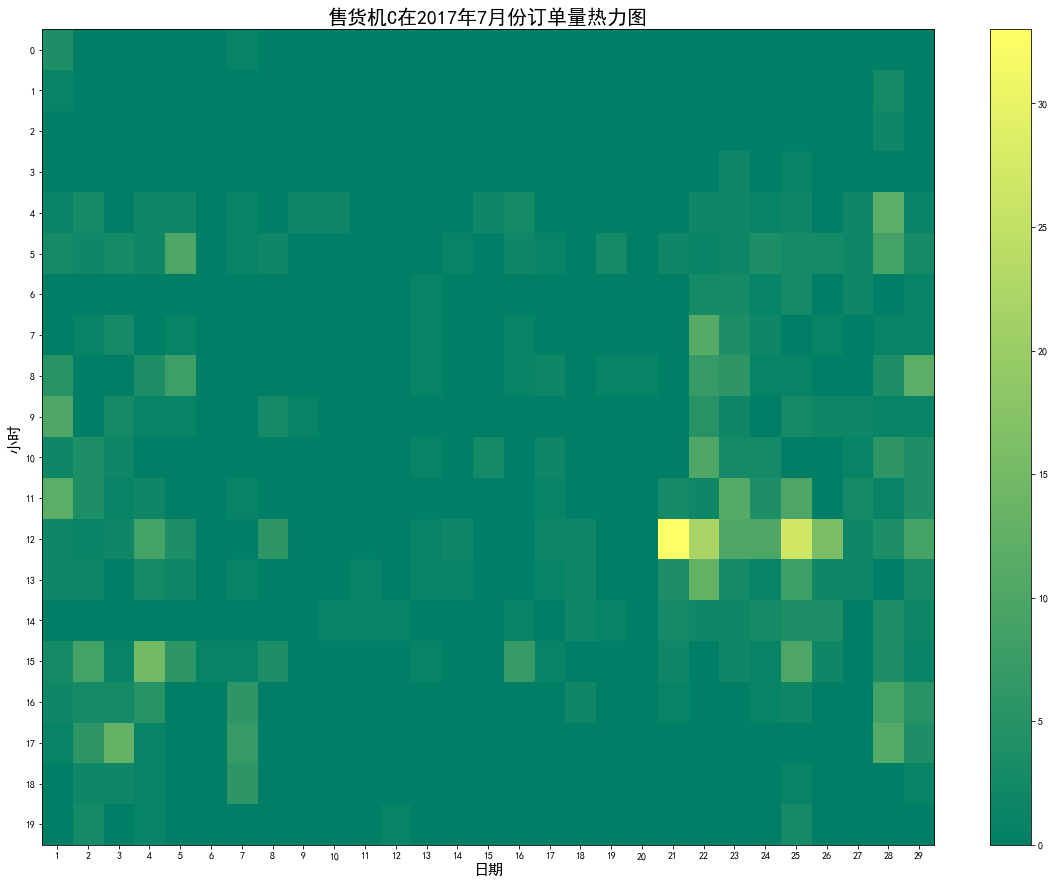

In [36]:
draw_heatmap(heat_data2, x_30, y_24,
             '售货机C在2017年7月份订单量热力图','temp/售货机C在2017年7月份订单量热力图.png') 

In [37]:
# August
temp_sh = app_merge.loc[((app_merge['month'] == 8) & 
                          (app_merge['地点'] == 'C')), :]
heat_data3 = temp_sh.groupby(['日期', '小时'])['订单号'].count().unstack()#把花括号结构转化为表格结构
heat_data3 = heat_data3.fillna(0)  #把NaN填为0
heat_data3 = heat_data3.T          #转置

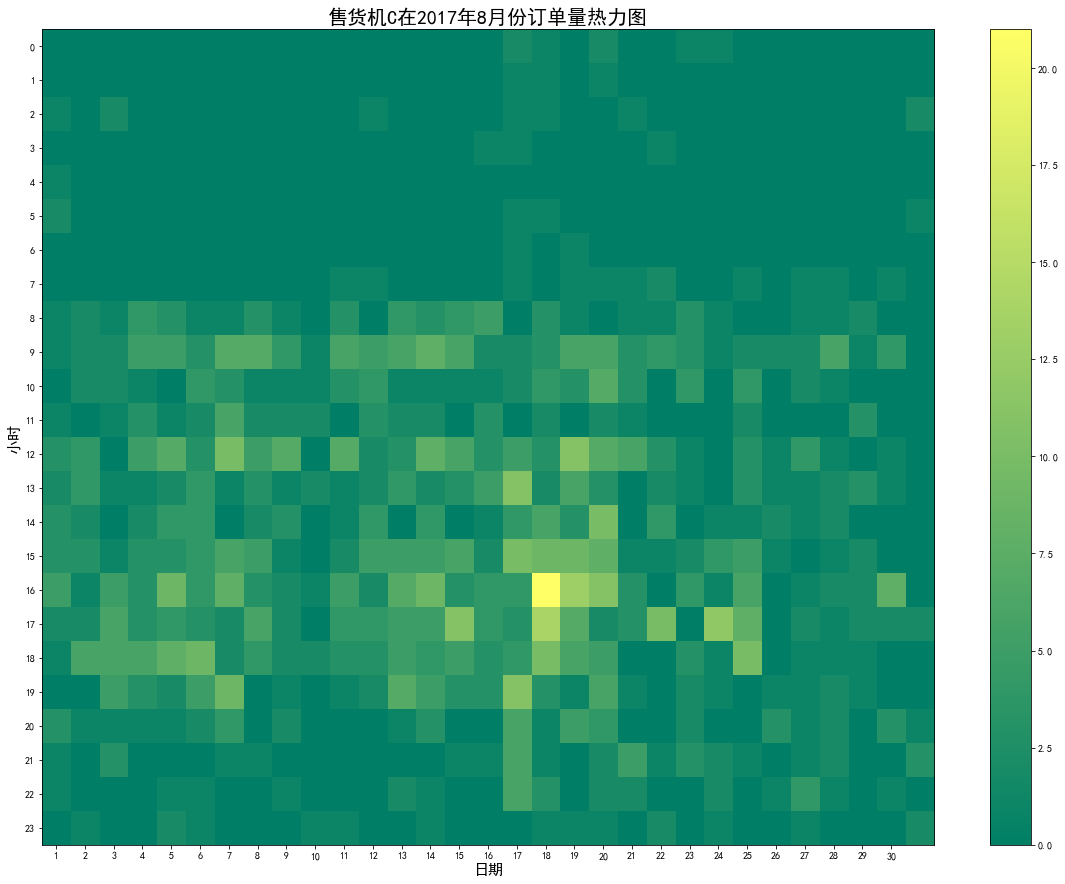

In [38]:
draw_heatmap(heat_data3, x_30, y_24,
             '售货机C在2017年8月份订单量热力图','temp/售货机C在2017年8月份订单量热力图.png') 